## 导入依赖

In [1]:
import os
import numpy as np
import torch
import cv2
from matplotlib import pyplot as plt
# YoloV8
from ultralytics import YOLO

In [2]:
%matplotlib inline

np.set_printoptions(precision=3, suppress=True)
torch.set_printoptions(precision=3, sci_mode=False)

## 创建模型

In [3]:
# 模型路径
model_path = os.path.join(os.path.abspath("."), "weights", "bottle_cap_yolov8n.pt")
print(model_path)

/home/kyle/Project/奥比中光3D相机/Gemini335-软件资料-阿凯爱玩机器/04.Gemini-3D相机案例源码/yolov8-detect-example/weights/bottle_cap_yolov8n.pt


In [4]:
# 载入目标检测模型(使用绝对路径)
model = YOLO(model_path)

## 打印模型信息

In [5]:
print("类别ID与名称")
print(model.names)

类别ID与名称
{0: 'bottle_cap'}


In [6]:
model.info()

YOLOv8n summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

## 载入图像

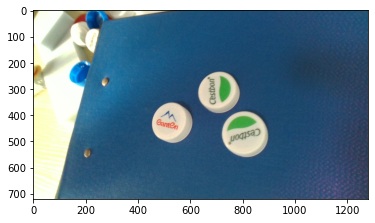

In [7]:
img = cv2.imread("data/2.png")
plt.imshow(img[:, :, ::-1])

## 目标检测(模型预测)

模型预测
https://docs.ultralytics.com/modes/predict/#arguments

In [8]:
# 注意事项:
# - imgsz: 输入图像尺寸, 必须为32的倍数
# - conf: 置信度
# - iou: IOU阈值
results = model(img, imgsz=1088, conf=0.5, iou=0.6)

print("[tensor类型] results[0].boxes.data: ")
# 获取Boxes信息
# x1, y1, x2, y2, conf, class_id
print(results[0].boxes.data)
print("[list类型] boxes_list")
# 转换为list
boxes_list = results[0].boxes.data.tolist()
print(boxes_list)


0: 640x1088 3 bottle_caps, 12.2ms
Speed: 5.5ms preprocess, 12.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 1088)
[tensor类型] results[0].boxes.data: 
tensor([[  717.633,   383.685,   901.938,   568.346,     0.883,     0.000],
        [  449.467,   348.137,   611.456,   511.719,     0.876,     0.000],
        [  629.584,   232.576,   788.747,   388.791,     0.863,     0.000]], device='cuda:0')
[list类型] boxes_list
[[717.6327514648438, 383.6845703125, 901.9376220703125, 568.3460083007812, 0.8828524351119995, 0.0], [449.467041015625, 348.1371765136719, 611.45556640625, 511.71856689453125, 0.8760513663291931, 0.0], [629.5836181640625, 232.5760040283203, 788.7472534179688, 388.79083251953125, 0.8626558780670166, 0.0]]


## 预测结果可视化

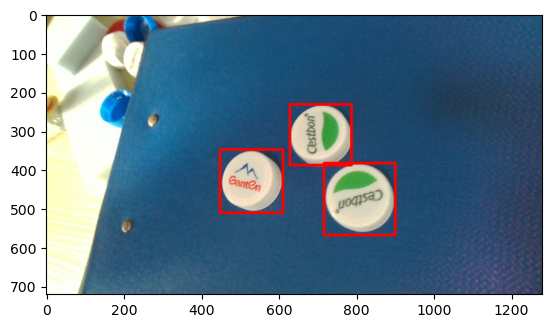

In [16]:
canvas = np.copy(img)
for box in boxes_list:
    x1, y1, x2, y2, conf, class_id = box
    pt1 = (int(x1), int(y1))
    pt2 = (int(x2), int(y2))
    color = (0, 0, 255)
    thickness = 5    
    canvas = cv2.rectangle(canvas, pt1, pt2, color, thickness)
plt.imshow(canvas[:, :, ::-1])
# cv2.imwrite("canvas.png", canvas)

## 函数封装

In [17]:
def detect(img):
    '''目标检测'''
    # 注意事项:
    # - imgsz: 输入图像尺寸, 必须为32的倍数
    # - conf: 置信度
    # - iou: IOU阈值
    results = model(img, imgsz=1088, conf=0.5, iou=0.6)
    # 转换为list
    boxes_list = np.float64(results[0].boxes.data.tolist())
    xyxy_list = boxes_list[:, :4].astype(np.int32).tolist()
    conf_list = boxes_list[:, 4]
    class_id_list = boxes_list[:, 5].astype(np.int32).tolist()
    
    canvas = np.copy(img)
    for box in boxes_list:
        x1, y1, x2, y2, conf, class_id = box
        pt1 = (int(x1), int(y1))
        pt2 = (int(x2), int(y2))
        color = (0, 0, 255)
        thickness = 5    
        canvas = cv2.rectangle(canvas, pt1, pt2, color, thickness)
    return canvas, class_id_list, xyxy_list, conf_list


0: 640x1088 3 bottle_caps, 6.0ms
Speed: 5.5ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1088, 1088)


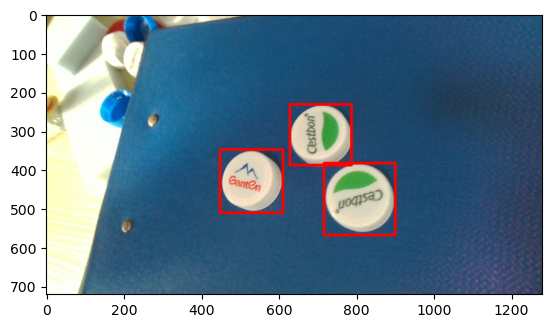

In [18]:
canvas, class_id_list, xyxy_list, conf_list = detect(img)
plt.imshow(canvas[:, :, ::-1])